## 分享滑动窗口模板
《挑战程序设计竞赛》这本书中把滑动窗口叫做 **「虫取法」**，因为滑动窗口的两个指针移动的过程和虫子爬动的过程非常像：**前脚不动，把后脚移动过来；后脚不动，把前脚向前移动。**

**滑动窗口的模板如下**

```pythoon
def findSubArray(nums):
    N = len(nums) # 数组/字符串长度
    left, right = 0, 0 # 双指针，表示当前遍历的区间[left, right]，闭区间
    sums = 0 # 用于统计 子数组/子区间 是否有效，根据题目可能会改成求和/计数
    res = 0 # 保存最大的满足题目要求的 子数组/子串 长度
    while right < N: # 当右边的指针没有搜索到 数组/字符串 的结尾
        sums += nums[right] # 增加当前右边指针的数字/字符的求和/计数
        while 区间[left, right]不符合题意：# 此时需要一直移动左指针，直至找到一个符合题意的区间
            sums -= nums[left] # 移动左指针前需要从counter中减少left位置字符的求和/计数
            left += 1 # 真正的移动左指针，注意不能跟上面一行代码写反
        # 到 while 结束时，我们找到了一个符合题意要求的 子数组/子串
        res = max(res, right - left + 1) # 需要更新结果
        right += 1 # 移动右指针，去探索新的区间
    return res
```

滑动窗口中用到了左右两个指针

它们移动的思路是：
- 以右指针作为主动，拖着左指针被动向前走。
- 右指针每次只移动一步，而左指针在内部 while 循环中每次可能移动多步。

模板的整体思想是：

- 定义两个指针 $left$ 和 $right$ 分别指向区间的开头和结尾，注意是闭区间；
- 定义 $sums$ 用来统计该区间内的各个字符出现次数；
- 第一重 `while` 循环是为了判断 $right$ 指针的位置是否超出了数组边界；
   - 当 $right$ 每次到了新位置，需要增加 $right$ 指针的求和/计数；
- 第二重 `while` 循环是让 $left$ 指针向右移动到 $[left, right]$ 区间符合题意的位置；
   - 当 $left$ 每次移动到了新位置，需要减少 $left$ 指针的求和/计数；
- 在第二重 `while` 循环之后，成功找到了一个符合题意的 $[left, right]$ 区间，题目要求最大的区间长度，因此更新 `res` 为 `max(res, 当前区间的长度) `。
- $right$ 指针每次向右移动一步，开始探索新的区间。

1. 模板中的 sums 需要根据题目意思具体去修改

 - 本题是**求和**题目因此把 sums 定义成整数用于求和；

 - 如果是**计数**题目，就需要改成**字典用于计数**。当左右指针发生变化的时候，都需要更新 `sums` 。

2. 另外一个需要根据题目去修改的是内层 **while 循环的判断条件**

  - 即： 区间 $[left,right]$ 不符合题意


## 「1004. 最大连续1的个数 III」

给定一个由若干 0 和 1 组成的数组 A，我们最多可以将 K 个值从 0 变成 1 。

返回仅包含 1 的最长（连续）子数组的长度。

示例 1：
```
输入：A = [1,1,1,0,0,0,1,1,1,1,0], K = 2
输出：6
解释： 
[1,1,1,0,0,1,1,1,1,1,1]
粗体数字从 0 翻转到 1，最长的子数组长度为 6。
```

示例 2：
```
输入：A = [0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1], K = 3
输出：10
解释：
[0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1]
粗体数字从 0 翻转到 1，最长的子数组长度为 10。
```

#### 解题思路
重点：**「找出一个最长的子数组，该子数组内最多允许有 K 个 0 」**

#### 代码思路：

使用 $left$ 和 $right$ 两个指针，分别指向滑动窗口的左右边界。

$right$ 主动右移：$right$ 指针每次移动一步。当 $A[right]$ 为 00，说明滑动窗口内增加了一个 00；

$left$ 被动右移：判断此时窗口内 00 的个数，如果超过了 $K$，则 $left$ 指针被迫右移，直至窗口内的 $0$ 的个数小于等于 $K$ 为止。

滑动窗口长度的最大值就是所求。

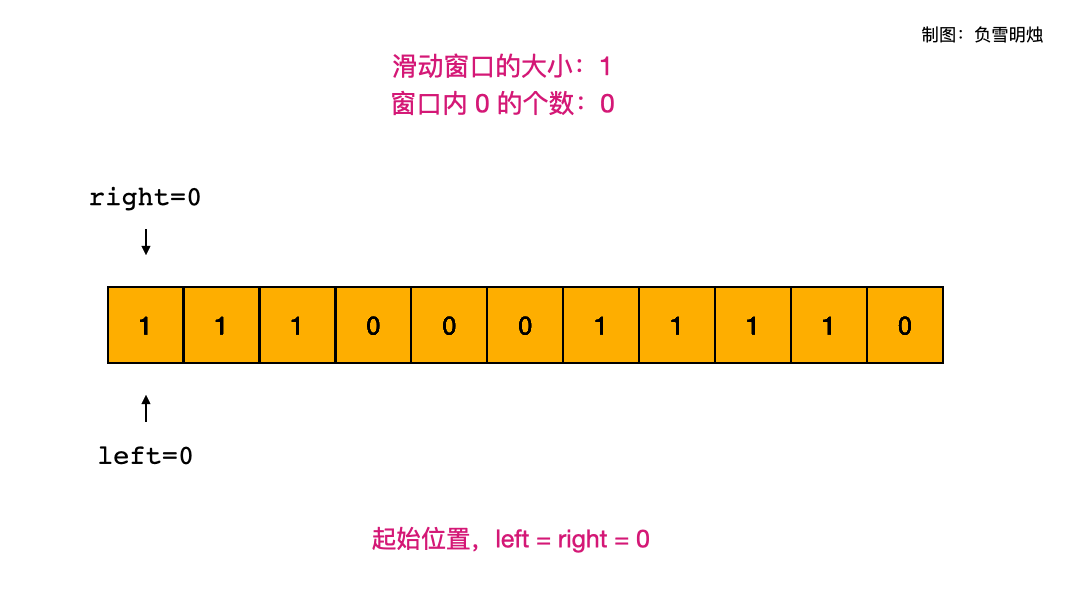



In [1]:
from typing import List
class Solution:
    def longestOnes(self, A: List[int], K: int) -> int:
        res = 0
        right, left = 0, 0
        N = len(A)
        zero = 0
        while right < N:
            if A[right] == 0:
                zero += 1
            while zero > K:
                if A[left] == 0:
                    zero -= 1
                left += 1
            res = max(res, right - left + 1)
            right += 1
        return res

In [2]:
A = [1,1,1,0,0,0,1,1,1,1,0]
K = 2
ss = Solution()
O1 = ss.longestOnes(A, K)
print(O1)

6



时间复杂度：$O(N)$，因为每个元素只遍历了一次。

空间复杂度：$O(1)$，因为使用了常数个空间。

## 1438. 绝对差不超过限制的最长连续子数组

给你一个整数数组 nums ，和一个表示限制的整数 limit，请你返回最长连续子数组的长度，该子数组中的任意两个元素之间的绝对差必须小于或者等于 limit 。

如果不存在满足条件的子数组，则返回 0 。

示例 1：
```
输入：nums = [8,2,4,7], limit = 4
输出：2 
解释：所有子数组如下：
[8] 最大绝对差 |8-8| = 0 <= 4.
[8,2] 最大绝对差 |8-2| = 6 > 4. 
[8,2,4] 最大绝对差 |8-2| = 6 > 4.
[8,2,4,7] 最大绝对差 |8-2| = 6 > 4.
[2] 最大绝对差 |2-2| = 0 <= 4.
[2,4] 最大绝对差 |2-4| = 2 <= 4.
[2,4,7] 最大绝对差 |2-7| = 5 > 4.
[4] 最大绝对差 |4-4| = 0 <= 4.
[4,7] 最大绝对差 |4-7| = 3 <= 4.
[7] 最大绝对差 |7-7| = 0 <= 4. 
因此，满足题意的最长子数组的长度为 2 。
```
示例 2：
```
输入：nums = [10,1,2,4,7,2], limit = 5
输出：4 
解释：满足题意的最长子数组是 [2,4,7,2]，其最大绝对差 |2-7| = 5 <= 5 。
```
示例 3：
```
输入：nums = [4,2,2,2,4,4,2,2], limit = 0
输出：3
 ```

提示：

```
1 <= nums.length <= 10^5
1 <= nums[i] <= 10^9
0 <= limit <= 10^9
```


### 解题技巧

本题最大的难点在于快速地求**滑动窗口内的最大值和最小值**

如果遍历求滑动窗口内的最大值和最小值，时间复杂度是 **O(k)**，肯定会超时。

降低时间复杂度的一个绝招就是增加空间复杂度：利用更好的数据结构

目的: 快速让一组数据有序 = 寻找一个内部有序的数据结构

### 查找最大最小值
#### C++：Multiset
Multiset内部结构如图：
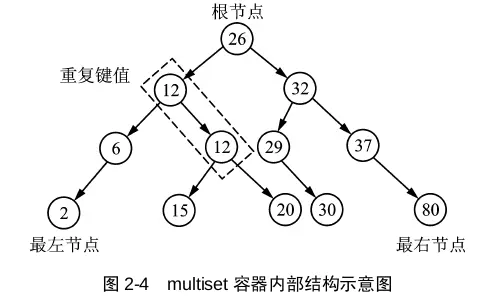

- 是一个平衡二叉搜索树(BST)
- 插入元素时会自动调整二叉树，使得每个子树根节点的键值大于左子树所有节点的键值，
- 同时保证根节点左右子树的高度相等 -- 这样二叉树高度最小，检索速度最快。
- 它的中序遍历是有序的，另外它也允许出现重复的值。
#### 平衡二叉查找树
**平衡二叉查找树**：简称平衡二叉树

它具有如下几个性质：
- 可以是空树。
- 假如不是空树，任何一个结点的左子树与右子树都是平衡二叉树，并且**高度之差的绝对值不超过 1**

（即两边的分量大约相同）

### 解题思路
本题需要保存滑动窗口内的所有元素（可能含有重复元素）

 - 使用 $left$ 和 $right$ 两个指针，分别指向滑动窗口的左右边界；
 - 定义 multiset 保存滑动窗口的所有元素；
 - $right$ 主动右移：$right$ 指针每次移动一步，把 $A[right]$ 放入滑动窗口；
 - $left$ 被动右移：判断此时窗口内最大值和最小值的差，如果大于 $limit$，则 $left$ 指针被迫右移，直至窗口内最大值和最小值的差小于等于 $limit$ 为止；
 - $left$ 每次右移之前，需要把 $A[left]$ 从 multiset 中减去一次。
 - 滑动窗口长度的最大值就是所求。

Python 需要使用 sortedcontainers 来维持数据结构的稳定性

In [6]:
from typing import List

class Solution:
    def longestSubarray(self, nums: List[int], limit: int) -> int:
        from sortedcontainers import SortedList
        s = SortedList()
        right, left = 0, 0
        res = 0
        N = len(nums)
        while right < N:
            s.add(nums[right])
            while s[-1] - s[0] > limit:
                s.remove(nums[left])
                left += 1
            res = max(res, right - left + 1)
            right += 1
        return res

In [8]:
ss = Solution()
L1, L2, L3, L4 = [8,2,4,7], [10,1,2,4,7,2], [4,2,2,2,4,4,2,2], [1,5,6,7,8,10,6,5,6]
limit_1, limit_2, limit_3, limit_4 = 4, 5, 0, 4

O1 = ss.longestSubarray(L1, limit_1)
O2 = ss.longestSubarray(L2, limit_2)
O3 = ss.longestSubarray(L3, limit_3)
O4 = ss.longestSubarray(L4, limit_4)

print(O1)
print(O2)
print(O3)
print(O4)

2
4
3
5
